## Introduction to Image Classification using Tensorflow and Keras

The current example is for traditional classification problem. Here we are going to build the Neural Network
model that does the classification of MNIST images which are hand written digit(0 to 9).

Import the necessary packages.

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

For this lab we use the hand written digits from MNIST data. Tensorflow has some predefined datasets
which can be downloaded using tensorflow dataset package.

In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds

Download the MNIST data using tensorflow datasets. For the first time the data will be loaded to the local disk. We can see where it is downloaded.

In [3]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

Explore the Metadata of the mnist tensorflow dataset

In [4]:
metadata

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

Explore the MNIST tensorflow dataset

In [5]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

Retrieve the train and test data sets

In [6]:
train_set, test_set = dataset['train'],dataset['test']

Explore the class names. Here our class names or the output class variables are digits from 0 to 9.

In [7]:
class_names = metadata.features['label'].names

In [8]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Draw a sample image. Here we are going to fetch a single image from the test data set.

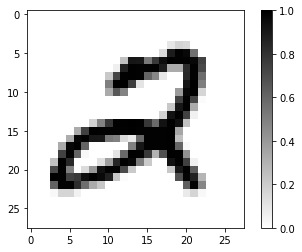

In [9]:
for image, label in test_set.take(1):
  break
image = image.numpy().reshape((28,28))
image = image/255

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Get the number of training and test data set sizes. This will be used in further chunks of code.

In [10]:
# Total Training and Test data.
train_data_size=metadata.splits['train'].num_examples
test_data_size=metadata.splits['test'].num_examples
print('Training data size : {}'.format(train_data_size))
print('Test data size : {}'.format(test_data_size))

Training data size : 60000
Test data size : 10000


Define a function that normalizes the images. Always the images are pixeled from 0 to 255.
Here we are going to divide the each image pixel by 255 to bring the pixel on to the scale from 0 to 1.

In [11]:
def normalize_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image/255
    return image, label

Normalize the train and test data set.

In [12]:
train_set = train_set.map(normalize_image)
test_set = test_set.map(normalize_image)

Use the cache function to load the data into the memory, initially the data will be loaded from the disk.
<br>But for all the subsequent runs the data will be accessed from the memory or the file that we specify in the cache function.

In [13]:
# Load the images into the memory to train the model faster
train_set = train_set.cache()
test_set = test_set.cache()

If you observe the image is of size 28 X 28 pixels. So in total every image has 784 features.
<br>We need to convert every image of 28 X 28 into array of 784 features.
<br>In keras we have a function to convert the 2 dimensional array into 1d array.
<br>Define the model layers as mentioned below.

In [14]:
inputLayer = tf.keras.layers.Flatten(input_shape=(28,28,1))
hidden_layer1 = tf.keras.layers.Dense(128, activation=tf.nn.relu)
hidden_layer2 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)

Define the keras model adding the above defined layers.

In [15]:
model = tf.keras.Sequential([inputLayer,
                            hidden_layer1,
                            hidden_layer2,
                            output_layer])

Compile the model. Here we are using the following parameters.
<br> <b>Loss</b> : Use the SparseCategoricalCrossentropy as this a multi class classification problem as the number of output classes are 10.
    <br><b>optimizer</b> : Using the Adam optimier. This will adjust the learning parameters such as weights and biases
<br><b>metrics</b> : Use the accuracy internally it will convert to one of the keras accuracy functions based on the loss parameter definition.

In [16]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

Define the batch size as 32 as the traning of the model will happen in the batch size of 32 in total number of 1875 batches.
<br>Shuffle the training data set with batch size of 32 with repetition so that the same data is not used for training the model in each epoch.
<br>Here we are using 5 epoch.
<br>Define the number of steps per each epoch with batch size 32 is total training data size / batch size.

In [17]:
batch_size=32
train_set = train_set.cache().repeat().shuffle(train_data_size).batch(batch_size)
test_set = test_set.cache().batch(batch_size)
history = model.fit(train_set, epochs=5, steps_per_epoch=math.ceil(train_data_size/batch_size))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2369 - accuracy: 0.9310
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0971 - accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0699 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9863


Test the model accuracy using the test data set. Model evaluate function test the accuracy of the model using the test date set.

In [18]:
test_loss, test_accuracy = model.evaluate(test_set, steps=math.ceil(test_data_size/32))
print('Test Set Accuracy : ', test_accuracy)
print('Test Set Loss : ', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0768 - accuracy: 0.9785
Test Set Accuracy :  0.9785000085830688
Test Set Loss :  0.07677853852510452


Define a function to plot the images of the test data set with actual label and predicted labels.
<br> Here we show the label blue in color if the actual and predicted label matches otherwise red in color.

In [33]:
def plot_images(images, cls_true, cls_pred=None):
    n = math.ceil(np.sqrt(len(images))) 
    fig, axes = plt.subplots(n, n +1, figsize=(15, 10))
    fig.subplots_adjust(hspace=1, wspace=1)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        if(i<len(images)):
            ax.imshow(images[i].reshape(28,28), cmap=plt.cm.gray)

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "Actual: {0}".format(cls_true[i])
            else:
                xlabel = "Actual: {0},\n Prediction: {1}".format(cls_true[i], cls_pred[i])
            # Shows the color of the text as red if the predicted label 
            # doesn't match with the actual value.
            if cls_pred[i]!=cls_true[i]:
                label_color = 'red'
            else:
                label_color = 'blue'
            ax.set_xlabel(xlabel, color=label_color)

            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
    plt.tight_layout()    
    plt.show()

Since we set the batch size as 32 in the earlier step now every take will give you 32 images at a time.
take(1) gives 32 images where are take(313) will return 32 or less as we will reach the last batch of the test data set.

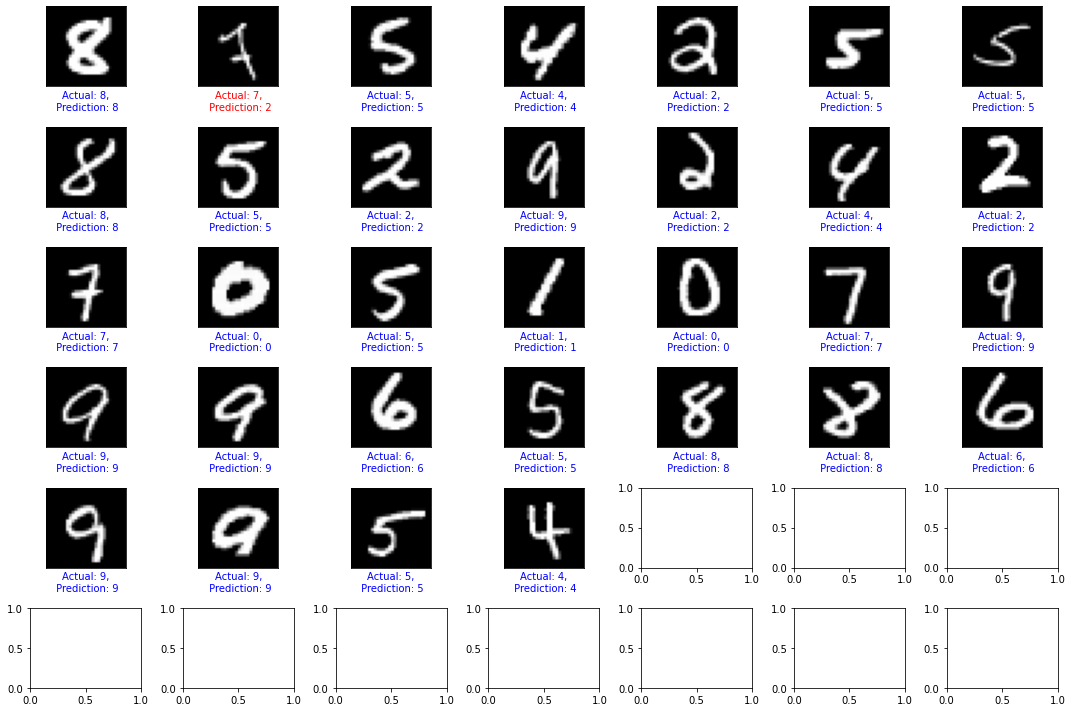

In [34]:
for test_images, test_labels in test_set.take(2):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
plot_images(test_images, test_labels, np.argmax(predictions,axis=1))

In the next section we will discuss the Convolutional Neural Networks for the Image processing and predictions